![](https://cdn.images.express.co.uk/img/dynamic/143/590x/League-of-Legends-servers-down-1259147.webp?r=1585327760984)

# Introduction
League of Legends (LoL) is a multiplayer online battle arena video game developed and published by Riot Games for Microsoft Windows and macOS. In League of Legends, players assume the role of a "champion" with unique abilities and battle against a team of other player- or computer-controlled champions. The goal is usually to destroy the opposing team's "Nexus", a structure that lies at the heart of a base protected by defensive structures, although other distinct game modes exist as well with varying objectives, rules, and maps. Each League of Legends match is discrete, with all champions starting off relatively weak but increasing in strength by accumulating items and experience over the course of the game.
This dataset contains the first 10min. stats of approx. 10k ranked games (SOLO QUEUE) from a high ELO (DIAMOND I to MASTER). Players have roughly the same level. There are 19 features per team (38 in total) collected after 10min in-game. This includes kills, deaths, gold, experience, level… It's up to you to do some feature engineering to get more insights. The column blueWins is the target value (the value we are trying to predict). A value of 1 means the blue team has won.
This notebook is aim to predict which features are more correlated with winning. 

### Set UP

In [1]:
# Load packages and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


# EDA

In [4]:
# check missing values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [5]:
df_clean = df.copy()

In [6]:
# Drop some unecessary columns. e.g. blueFirstblood/redfirst blood blueEliteMonster/redEliteMonster blueDeath/redKills etc are repeated
# Based on personal experience with the game, mimion yield gold+experience, we can drop minion kill too
cols = ['gameId', 'redFirstBlood', 'redKills', 'redEliteMonsters', 'redDragons','redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redHeralds',
       'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'blueTotalMinionsKilled']
df_clean = df_clean.drop(cols, axis = 1)

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

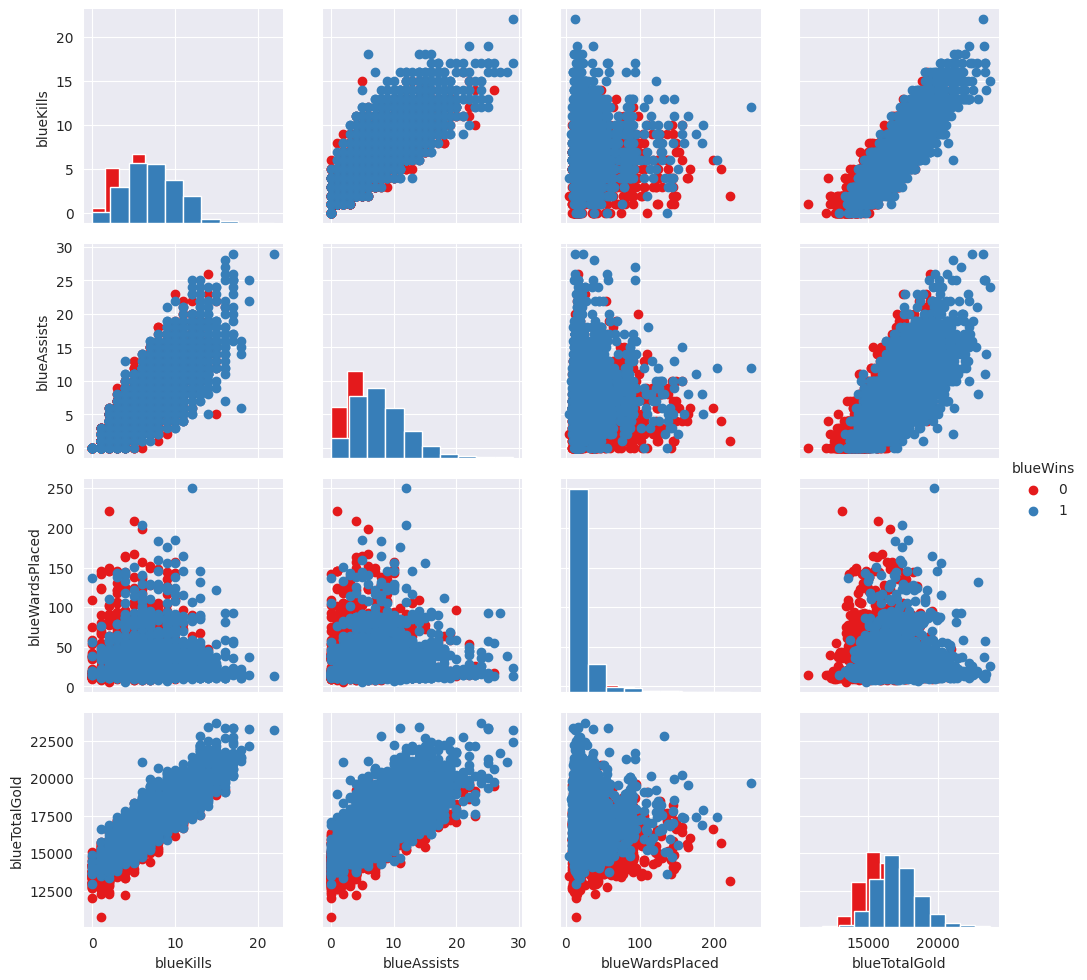

In [8]:
# Next let's check the relationship between parameters of blue team features
g = sns.PairGrid(data=df_clean, vars=['blueKills', 'blueAssists', 'blueWardsPlaced', 'blueTotalGold'], hue='blueWins', palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

We can see a lot of co-linearity between variables

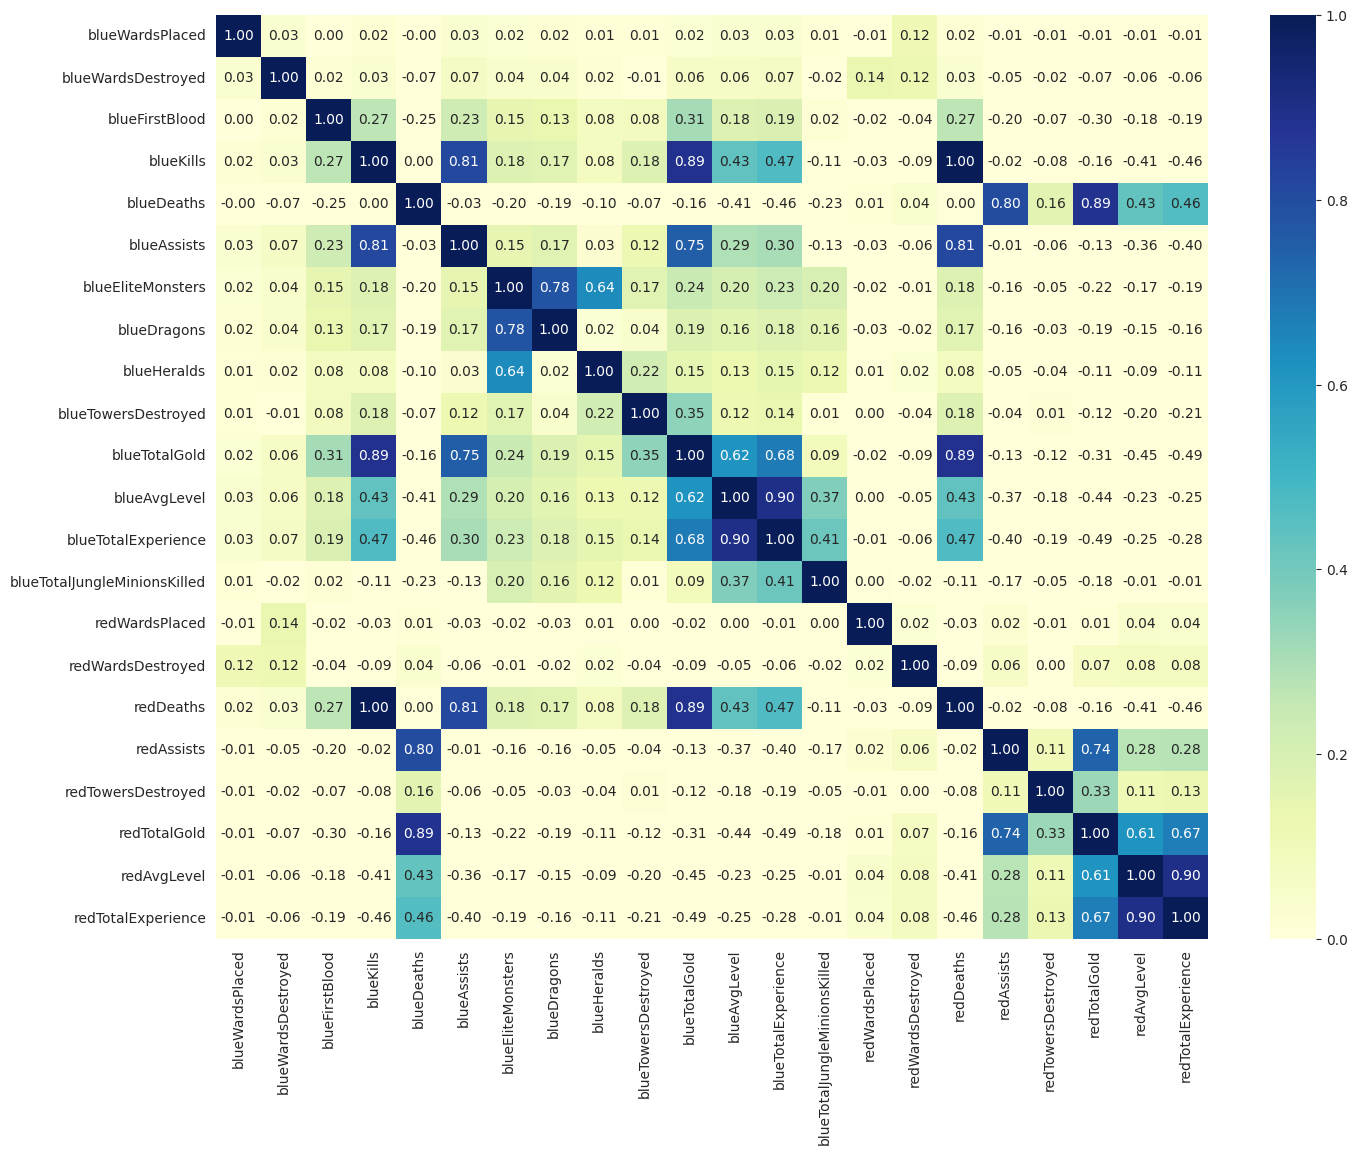

In [9]:
# We can see that a lot of the features are highly correlated, let's get the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(df_clean.drop('blueWins', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [10]:
# Based on the correlation matrix, let's clean the dataset a little bit more to avoid colinearity
cols = ['blueAvgLevel', 'redWardsPlaced', 'redWardsDestroyed', 'redDeaths', 'redAssists', 'redTowersDestroyed',
       'redTotalExperience', 'redTotalGold', 'redAvgLevel']
df_clean = df_clean.drop(cols, axis=1)

In [11]:
# Next let's drop the columns has little correlation with bluewins
corr_list = df_clean[df_clean.columns[1:]].apply(lambda x: x.corr(df_clean['blueWins']))
cols = []
for col in corr_list.index:
    if (corr_list[col]>0.2 or corr_list[col]<-0.2):
        cols.append(col)
cols

['blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueTotalGold',
 'blueTotalExperience']

In [12]:
df_clean = df_clean[cols]
df_clean.head()

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience
0,1,9,6,11,0,0,17210,17039
1,0,5,5,5,0,0,14712,16265
2,0,7,11,4,1,1,16113,16221
3,0,4,5,5,1,0,15157,17954
4,0,6,6,6,0,0,16400,18543


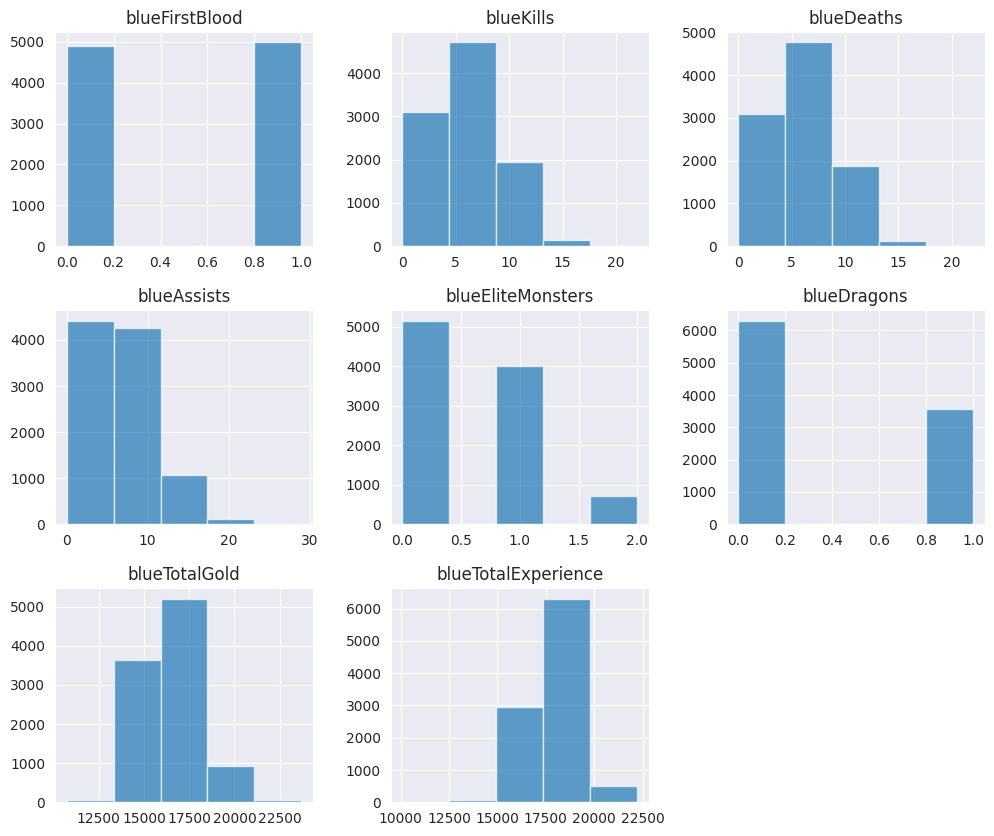

In [13]:
df_clean.hist(alpha = 0.7, figsize=(12,10), bins=5);

# Model Selection

In [14]:
# train test split scale the set
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X = df_clean
y = df['blueWins']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# fit the model
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

pred_nb = clf_nb.predict(X_test)

# get the accuracy score
acc_nb = accuracy_score(pred_nb, y_test)
print(acc_nb)

0.7176113360323887


## Decision Tree

In [16]:
# fit the decision tree model
from sklearn import tree
from sklearn.model_selection import GridSearchCV

tree = tree.DecisionTreeClassifier()

# search the best params
grid = {'min_samples_split': [5, 10, 20, 50, 100]},

clf_tree = GridSearchCV(tree, grid, cv=5)
clf_tree.fit(X_train, y_train)

pred_tree = clf_tree.predict(X_test)

# get the accuracy score
acc_tree = accuracy_score(pred_tree, y_test)
print(acc_tree)

0.6928137651821862


## Random Forests

In [17]:
# fit the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# search the best params
grid = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}

clf_rf = GridSearchCV(rf, grid, cv=5)
clf_rf.fit(X_train, y_train)

pred_rf = clf_rf.predict(X_test)
# get the accuracy score
acc_rf = accuracy_score(pred_rf, y_test)
print(acc_rf)

0.7252024291497976


## Logistic Regression

In [18]:
# fit logistic regression model
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, y_train)

# get accuracy score
pred_lm = lm.predict(X_test)
acc_lm = accuracy_score(pred_lm, y_test)
print(acc_lm)

0.7302631578947368


## K-nearest neighbours

In [19]:
# fit the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 

# search the best params
grid = {"n_neighbors":np.arange(1,100)}
clf_knn = GridSearchCV(knn, grid, cv=5)
clf_knn.fit(X_train,y_train) 

# get accuracy score
pred_knn = clf_knn.predict(X_test) 
acc_knn = accuracy_score(pred_knn, y_test)
print(acc_knn)

0.7171052631578947


# Conclusion

In [20]:
data_dict = {'Naive Bayes': [acc_nb], 'DT': [acc_tree], 'Random Forest': [acc_rf], 'Logistic Regression': [acc_lm], 'K_nearest Neighbors': [acc_knn]}
df_c = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Accuracy Score'])
print(df_c)

                     Accuracy Score
Naive Bayes                0.717611
DT                         0.692814
Random Forest              0.725202
Logistic Regression        0.730263
K_nearest Neighbors        0.717105


From the accuracy score, we can see that logistic regression and random forests predict the best. Next let's take a closer look at the recall and precision of these two methods.

In [21]:
# recall and precision
from sklearn.metrics import recall_score, precision_score

# params for lm 
recall_lm = recall_score(pred_lm, y_test, average = None)
precision_lm = precision_score(pred_lm, y_test, average = None)
print('precision score for naive bayes: {}\n recall score for naive bayes:{}'.format(precision_lm, recall_lm))

precision score for naive bayes: [0.72736521 0.73313192]
 recall score for naive bayes:[0.72959184 0.73092369]


In [22]:
# params for rf
recall_rf = recall_score(pred_rf, y_test, average = None)
precision_rf = precision_score(pred_rf, y_test, average = None)
print('precision score for naive bayes: {}\n recall score for naive bayes:{}'.format(precision_rf, recall_rf))

precision score for naive bayes: [0.73346897 0.71701913]
 recall score for naive bayes:[0.71956088 0.73100616]


In general, I probabily will choose the logistic regressaion after tweat a little bit.

In [23]:
df_clean.columns

Index(['blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueTotalGold',
       'blueTotalExperience'],
      dtype='object')

In [24]:
lm.coef_

array([[ 0.09774618,  1.61664247, -4.8653555 , -0.2625516 ,  0.30534437,
         0.2947777 ,  5.35409797,  1.74486909]])

In [25]:
np.exp(lm.coef_)

array([[1.10268286e+00, 5.03615284e+00, 7.70908711e-03, 7.69086679e-01,
        1.35709227e+00, 1.34282781e+00, 2.11473136e+02, 5.72515194e+00]])

In [26]:
coef_data = np.concatenate((lm.coef_, np.exp(lm.coef_)),axis=0)
coef_df = pd.DataFrame(data=coef_data, columns=df_clean.columns).T.reset_index().rename(columns={'index': 'Var', 0: 'coef', 1: 'oddRatio'})
coef_df.sort_values(by='coef', ascending=False)

,Var,coef,oddRatio
6,blueTotalGold,5.354098,211.473136
7,blueTotalExperience,1.744869,5.725152
1,blueKills,1.616642,5.036153
4,blueEliteMonsters,0.305344,1.357092
5,blueDragons,0.294778,1.342828
0,blueFirstBlood,0.097746,1.102683
3,blueAssists,-0.262552,0.769087
2,blueDeaths,-4.865356,0.007709


### PCA

In [27]:
# try to visualize the results using PCA
X = df_clean
y = df['blueWins']

# PCA is affected by scale, scale the dataset first
from sklearn import preprocessing 
# Standardizing the features
X = preprocessing.StandardScaler().fit_transform(X)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.42435947 0.20805752]


In [29]:
# create visulization df
df_vis = pd.DataFrame(data = components, columns = ['pc1', 'pc2'])
df_vis = pd.concat([df_vis, df['blueWins']], axis = 1)
X = df_vis[['pc1', 'pc2']]
y = df_vis['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# refit the pca data
lm.fit(X_train, y_train)

LogisticRegression()

In [31]:
# visualize function
from matplotlib.colors import ListedColormap
def DecisionBoundary(clf):
    X = df_vis[['pc1', 'pc2']]
    y = df_vis['blueWins']
    
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    #Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

/home/yael/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


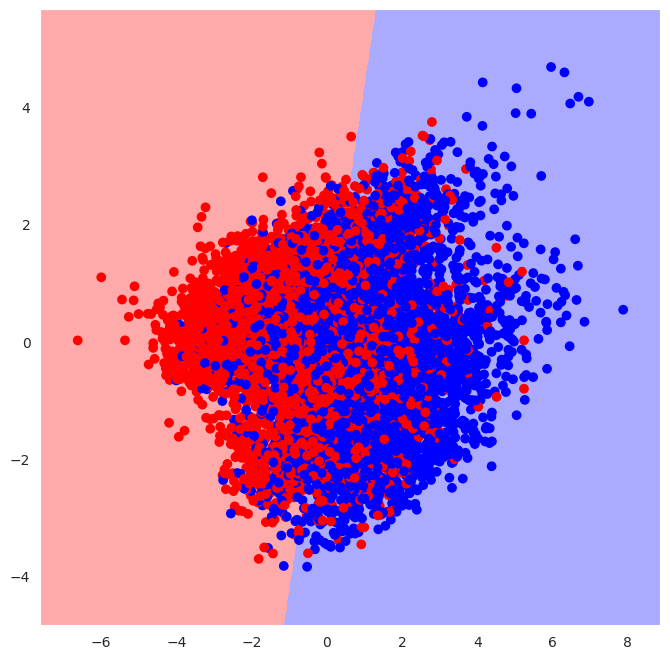

In [33]:
DecisionBoundary(lm)